In [ ]:
from google.colab import files # colaboratoryのライブラリからファイル操作を使用する。
f = files.upload()

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


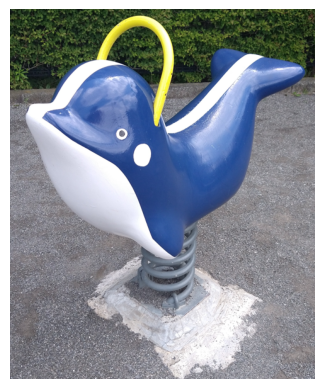

In [2]:
import cv2
import matplotlib.pyplot as plt

# サンプル画像
file1 = "/content/gdrive/MyDrive/Colab Notebooks/3d/01/001.png"
file2 = "/content/gdrive/MyDrive/Colab Notebooks/3d/01/002.png"

# 画像のロード
img1 = cv2.imread(file1)
img2 = cv2.imread(file2)

# 画像の表示関数
def display(img):
  show_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # 表示のためBGRをRGBに変換する。
  plt.axis('off')
  plt.imshow(show_img) # matplot.libを用いて読み込んだ画像を表示します。

# 画像の表示
# display(img1)
display(img2)


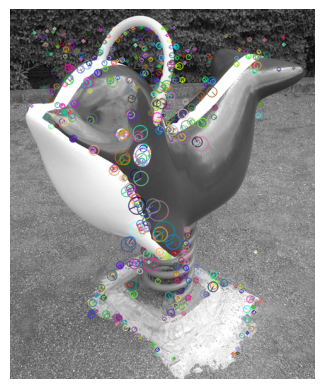

In [3]:
# グレースケール変換
# from_img = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

#  AKAZE検出器の生成
akaze = cv2.AKAZE_create()

# gray1にAKAZEを適用、特徴点を検出
key_point1, descriptions1 = akaze.detectAndCompute(gray1,None)
# gray2にAKAZEを適用、特徴点を検出
key_point2, descriptions2 = akaze.detectAndCompute(gray2,None)

# キーポイントの表示
extraceted_img1 = cv2.drawKeypoints(gray1, key_point1, None, flags=4)
extraceted_img2 = cv2.drawKeypoints(gray2, key_point2, None, flags=4)
display(extraceted_img2)

matches_length=173


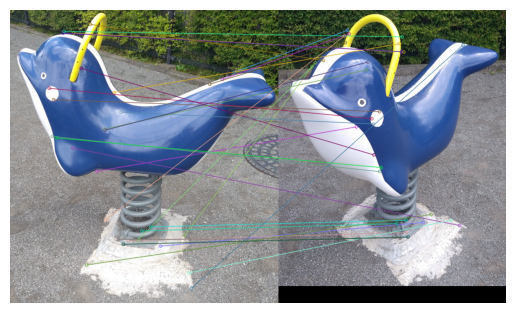

In [4]:
def match(img1, img2):
    # 各画像の特徴点を取る
    key_point1, descriptions1 = akaze.detectAndCompute(img1,None)
    key_point2, descriptions2 = akaze.detectAndCompute(img2,None)

    # BFMatcherオブジェクトの生成
    #  bf_matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING, True)
    bf_matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    # 2つの特徴点をマッチさせる
    matches = bf_matcher.match(descriptions1, descriptions2)

    # matchesをdescriptorsの似ている順にソートする
    matches = sorted(matches, key = lambda x:x.distance)
    matches_length = len(matches) # マッチした本数

    # 特徴点同士を線でつなぐつなぐ画像を作成 (線は似ている順の先頭30本まで表示)
    match_img = cv2.drawMatches(img1, key_point1, img2, key_point2, matches[:30], None, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return match_img, matches_length

# 画像のロード
match_img, matches_length= match(img1, img2)
display(match_img)
print(f"matches_length={matches_length}")
